<a href="https://colab.research.google.com/github/MuhammetSarican/global_ai_hub-summer_camp/blob/main/Project_2-Transfer_Learning/Adjusting_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning Projesi Data Ayıklama İşlemi

Colab'in drive bağlanması için gerekli olan kod parçası

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bu kısımda zip içinde olan veri setimizi çıkartıyoruz.

---

In [4]:
!unzip "/content/drive/MyDrive/Datasets/kagglecatsanddogs_5340.zip"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

Bu kısımda gerekli olan kütüphane ve değişkenleri tanımlıyoruz.

---

In [12]:
import os
import cv2
from tensorflow.keras.utils import img_to_array
from matplotlib import pyplot as plt
import numpy as np

data=[]
data_val=[]
label=np.zeros((19958,2))
label_val=np.zeros((4988,2))
resize=150
count=0
count_val=0

In [13]:
dataset_path="/content/drive/MyDrive/Datasets/"

In [14]:
label.shape

(19958, 2)

In [15]:
len(data)

0

Bu kısımda çıkarttığımız zip içindeki resimlere döngü kullanarak erişiyoruz ve onları yeniden boyutlandırarak 'data' ve 'data_val' listelerine ekliyoruz. Datasetimizde 'Cat' ve 'Dog' adında iki adet sınıf olduğu için resimlerin hangi klasörden alındığına göre 'label' ve 'label_val' listelerine 0 veya 1 sayılarını ekliyoruz.(0 'Cat' Sınıfını, 1 'Dog' sınıfını temsil etmektedir.

Not: try-except yapısının kullanılma sebebi resimlerin içerisinde bazı formatı bozuk resimlerin olmasıdır.

---

In [16]:
def createDataset(label_number):
    global count,count_val
    if label_number==0:
        path="/content/PetImages/Cat/"
    elif label_number==1:
        path="/content/PetImages/Dog/"
    else:
        print('Hata...')
    print(path)
    counter_val=0
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            try:
                image=cv2.imread(path+filename)
                image=cv2.resize(image,(resize,resize))
                # image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                img_2_arr=img_to_array(image)
            except:
                continue
            key=cv2.waitKey(0)&0xff
            if key ==ord('q'):
                break
            if counter_val<2494:
                data_val.append(img_2_arr)
                label_val[count_val,label_number]=1
                count_val+=1
                counter_val+=1
            else:
                data.append(img_2_arr)
                label[count,label_number]=1
                count+=1

        else:
            print(filename)
    print(f"count: {count}")
    cv2.destroyAllWindows()

Bu kısımlarda herşeyin yolunda olup olmadığı kontrol edilmektedir.

---

In [17]:
len(data_val)

0

Bu kısımda oluşturduğumuz fonksiyonlar çağrılmaktadır.

---

In [18]:
createDataset(0)
createDataset(1)

/content/PetImages/Cat/
Thumbs.db
count: 9982
/content/PetImages/Dog/
Thumbs.db
count: 19958


In [19]:
data[0].shape

(150, 150, 3)

In [20]:
label.shape

(19958, 2)

Bu kısımda yine aynı şekilde 'data', 'data_val', 'label' ve 'label_test' listelerinin doğru şekilde oluşup oluşmadığının kontrolleri manuel bir şekilde yapılmaktadır.

---

A Dog...


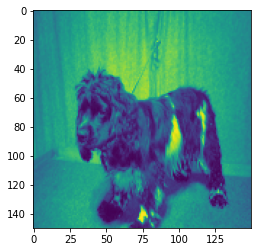

In [21]:
i=9988
plt.imshow(cv2.cvtColor(data[i].reshape(resize,resize,3),cv2.COLOR_BGR2GRAY))
if label[i,0]==1:
    print("A Cat...")
elif label[i,1]==1:
    print("A Dog...")
else: 
    print("An Error...")

Bu kısımda resimlerin ve labellerin bulunduğu listelerin boyutları eşit mi diye kontrol edilmektedir.

---

In [22]:
print(f"data size: {len(data)}\tlabel size: {len(label)}\tcount: {count}\ndata val size: {len(data_val)}\tlabel val size: {len(label_val)}\tcount val: {count_val}")

data size: 19958	label size: 19958	count: 19958
data val size: 4988	label val size: 4988	count val: 4988


Bu kısımda train_test_split fonksiyonuna girecek olan resim datası ve label verisi farklı değişkenlere atanmaktadır.(Sadece isim değişikliği :D)

In [23]:
# put labels into y_train variable
Y_train = label
# Drop 'label' column
X_train = data

train_test_split() fonksiyonu resim data ve label dosyasını belli oranda ve belli karışıklıkta bölmemizi kolaylaştıran bir fonksiyondur.

---

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)

Burada görüldüğü şekilde resim datası ve labelı 0.20 oranında 4 farklı listeye bölünmüştür.

---

In [25]:
print("X_train shape:",X_train[0].shape)
print("X_train len:",len(X_train),"\n")
print("X_test shape:",X_test[0].shape)
print("X_test len:",len(X_test),"\n")
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (150, 150, 3)
X_train len: 15966 

X_test shape: (150, 150, 3)
X_test len: 3992 

y_train shape: (15966, 2)
y_test shape: (3992, 2)


Bu kısımda isimlendirmede datasetin ne zaman oluşturulduğunu anlamak amacıyla bir date değişkeni oluşturulmuştur.

---

In [26]:
import datetime
date=datetime.datetime.now()
date.strftime("%x")
dateIs=f"{date.day}-{date.strftime('%b')}-{date.year}"
print(dateIs)

29-Aug-2022


In [27]:
len(X_train)

15966

Bu kısımda ise son aşama olan oluşturduğumuz datasetleri kaydetme aşamasına gelmiş bulunmaktayız. Numpy kütüphanesine ait save() fonksiyonu ile datasetleri birbirinden ayırt edebilcek şekilde ve numpy array formatında kayıt ediyoruz.

---

In [28]:
#Train array saving
np. save(f"{dataset_path}CatAndDog_X_train_{resize}_{dateIs}.npy", X_train)
np. save(f"{dataset_path}CatAndDog_y_train_{resize}_{dateIs}.npy", y_train)
print("Train arrays saved...")
#Test array saving
np. save(f"{dataset_path}CatAndDog_X_test_{resize}_{dateIs}.npy", X_test)
np. save(f"{dataset_path}CatAndDog_y_test_{resize}_{dateIs}.npy", y_test)
print("Test arrays saved...")
#Validation array saving
np. save(f"{dataset_path}CatAndDog_data_validation_{resize}_{dateIs}.npy", data_val)
np. save(f"{dataset_path}CatAndDog_label_validation_{resize}_{dateIs}.npy", label_val)
print("Validation arrays saved...")

Train arrays saved...
Test arrays saved...
Validation arrays saved...
